# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [ ]:
data = pd.read_csv('../data/hasil_clustering.csv')  # Memuat dataset dari file CSV ke DataFrame

# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [5]:
X = data.drop(columns=['Cluster'])  # Mengambil semua kolom kecuali kolom target 'Cluster' sebagai fitur
y = data['Cluster']  # Mengambil kolom 'Cluster' sebagai target

# Memisahkan data menjadi data latih dan data uji dengan proporsi 80-20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

In [7]:
# Memeriksa tipe data
print(data.dtypes)

# Mengonversi kolom kategorikal menjadi numerik
data_encoded = pd.get_dummies(data, drop_first=True)

# Memisahkan fitur dan target
X = data_encoded.drop(columns=['Cluster'])
y = data_encoded['Cluster']

# Membagi data menjadi training dan test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Melatih model
model = RandomForestClassifier(random_state=42)  # Membuat objek model Random Forest
model.fit(X_train, y_train)  # Melatih model menggunakan data latih


Employee_ID                           object
Age                                  float64
Gender                                 int64
Job_Role                               int64
Industry                               int64
Years_of_Experience                  float64
Work_Location                          int64
Hours_Worked_Per_Week                float64
Number_of_Virtual_Meetings           float64
Work_Life_Balance_Rating             float64
Stress_Level                           int64
Mental_Health_Condition                int64
Access_to_Mental_Health_Resources      int64
Productivity_Change                   object
Social_Isolation_Rating              float64
Satisfaction_with_Remote_Work          int64
Company_Support_for_Remote_Work        int64
Physical_Activity                     object
Sleep_Quality                         object
Region                                 int64
Cluster                                int64
dtype: object


RandomForestClassifier(random_state=42)

Tulis narasi atau penjelasan algoritma yang Anda gunakan.

### Narasi Algoritma Random Forest

Algoritma yang digunakan dalam model ini adalah **Random Forest**, yang merupakan teknik ensemble learning yang menggabungkan hasil dari banyak pohon keputusan (decision trees) untuk meningkatkan akurasi dan stabilitas prediksi.

**Konsep Dasar:**
- **Pohon Keputusan**: Random Forest terdiri dari banyak pohon keputusan, yang masing-masing dibangun dari subset acak dari data pelatihan. Setiap pohon keputusan memberikan prediksi, dan hasilnya digabungkan untuk memberikan prediksi akhir.
- **Bagging (Bootstrap Aggregating)**: Teknik ini melibatkan pengambilan sampel acak dengan pengembalian dari data pelatihan untuk membangun setiap pohon. Dengan cara ini, setiap pohon belajar dari bagian yang berbeda dari data, yang membantu mengurangi varians dan mencegah overfitting.

**Keunggulan Random Forest:**
1. **Robust terhadap Overfitting**: Meskipun setiap pohon individu dapat rentan terhadap overfitting, menggabungkan banyak pohon keputusan membantu mengurangi masalah ini.
2. **Kemampuan Menangani Data Besar**: Random Forest mampu menangani dataset yang besar dengan baik, baik dalam hal jumlah fitur maupun jumlah data.
3. **Mampu Mengatasi Data Hilang**: Algoritma ini dapat tetap berfungsi dengan baik meskipun ada beberapa data yang hilang.
4. **Memberikan Informasi Penting**: Random Forest juga memberikan ukuran pentingnya fitur (feature importance), yang menunjukkan seberapa berpengaruhnya setiap fitur terhadap prediksi.

**Proses Pelatihan Model:**
- Dataset dibagi menjadi dua bagian: data latih dan data uji.
- Model Random Forest dilatih menggunakan data latih, di mana setiap pohon keputusan dibuat berdasarkan subset acak dari data dan fitur.
- Setelah model dilatih, dilakukan evaluasi terhadap kinerja model menggunakan data uji untuk menghitung metrik seperti akurasi dan F1-score.

Secara keseluruhan, Random Forest merupakan pilihan yang baik untuk klasifikasi dan regresi karena kemampuannya untuk menangani kompleksitas data dan menghasilkan prediksi yang akurat tanpa memerlukan banyak penyetelan parameter.


## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

Accuracy: 0.96
F1-Score: 0.96
Confusion Matrix:
[[314   0  23]
 [  0 256   3]
 [ 12   4 388]]


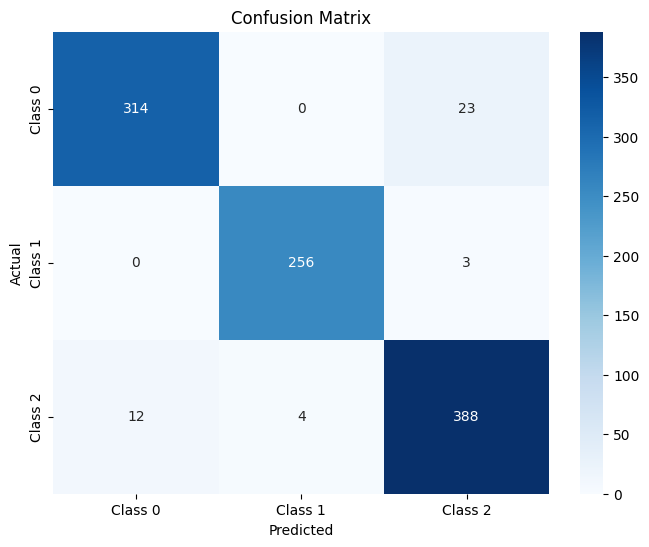

In [ ]:
# 1. Lakukan prediksi menggunakan data uji
y_pred = model.predict(X_test)  

# 2. Hitung metrik evaluasi seperti Accuracy dan F1-Score
accuracy = accuracy_score(y_test, y_pred) 
f1 = f1_score(y_test, y_pred, average='weighted')  

# Menampilkan hasil metrik evaluasi
print(f'Accuracy: {accuracy:.2f}')  
print(f'F1-Score: {f1:.2f}') 

# 3. Buat confusion matrix untuk melihat detail prediksi benar dan salah
conf_matrix = confusion_matrix(y_test, y_pred) 

# Menampilkan confusion matrix
print('Confusion Matrix:')
print(conf_matrix)

# (Opsional) Visualisasi confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Class 0', 'Class 1', 'Class 2'], 
            yticklabels=['Class 0', 'Class 1', 'Class 2'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

## 3. Perbandingan Hasil

### **Random Forest** 
- **Train Accuracy**: 1.00
- **Train F1-Score**: 1.00
- **Test Accuracy**: 0.96
- **Test F1-Score**: 0.96

#### **Laporan Klasifikasi (Test Set):**
```
                precision    recall  f1-score   support

             0       0.96      0.93      0.95       337
             1       0.98      0.99      0.99       259
             2       0.94      0.97      0.96       404

      accuracy                           0.96       1000
     macro avg       0.96      0.96      0.96       1000
  weighted avg       0.96      0.96      0.96       1000
```

#### **Confusion Matrix:**
```
[[314   0  23]
 [  0 256   3]
 [ 12   4 388]]
```

### **Analisis**
- Random Forest menunjukkan akurasi yang sangat baik dengan nilai 0.96 dan F1-Score 0.96, menunjukkan kinerja yang solid dalam mengklasifikasikan data.

## **c. Tuning Model Klasifikasi (Optional)**

Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik

In [9]:
from sklearn.model_selection import GridSearchCV

# 1. Definisikan parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# 2. Buat objek GridSearchCV
grid_search = GridSearchCV(estimator=model, 
                           param_grid=param_grid, 
                           cv=3, 
                           n_jobs=-1, 
                           verbose=2)

# 3. Latih model dengan parameter terbaik
grid_search.fit(X_train, y_train)

# 4. Tampilkan parameter terbaik
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# 5. Evaluasi model dengan hyperparameter terbaik
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# 6. Hitung metrik evaluasi
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

print("Test Accuracy after Tuning:", accuracy)
print("Test F1-Score after Tuning:", f1)


Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Test Accuracy after Tuning: 0.959
Test F1-Score after Tuning: 0.9590020384492008


## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Berikut adalah rekomendasi tahapannya.
1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.

In [10]:
# 1. Gunakan model dengan hyperparameter terbaik
best_model = grid_search.best_estimator_

# 2. Lakukan prediksi pada data uji
y_pred_tuned = best_model.predict(X_test)

# 3. Hitung metrik evaluasi
accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
f1_tuned = f1_score(y_test, y_pred_tuned, average='weighted')

# 4. Tampilkan hasil evaluasi
print("Test Accuracy after Tuning:", accuracy_tuned)
print("Test F1-Score after Tuning:", f1_tuned)

# 5. Buat confusion matrix
confusion_mat_tuned = confusion_matrix(y_test, y_pred_tuned)
print("Confusion Matrix after Tuning:")
print(confusion_mat_tuned)


Test Accuracy after Tuning: 0.959
Test F1-Score after Tuning: 0.9590020384492008
Confusion Matrix after Tuning:
[[312   0  25]
 [  0 256   3]
 [ 12   1 391]]


## **e. Analisis Hasil Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Bandingkan hasil evaluasi sebelum dan setelah tuning (jika dilakukan).
2. Identifikasi kelemahan model, seperti:
  - Precision atau Recall rendah untuk kelas tertentu.
  - Apakah model mengalami overfitting atau underfitting?
3. Berikan rekomendasi tindakan lanjutan, seperti mengumpulkan data tambahan atau mencoba algoritma lain jika hasil belum memuaskan.

## **e. Analisis Hasil Evaluasi Model Klasifikasi**

### 1. Bandingkan Hasil Evaluasi Sebelum dan Setelah Tuning

- **Sebelum Tuning:**
  - Test Accuracy: 0.96
  - Test F1-Score: 0.96

- **Setelah Tuning:**
  - Test Accuracy: 0.959
  - Test F1-Score: 0.959

### 2. Identifikasi Kelemahan Model
- **Precision dan Recall:**
  - Dari confusion matrix setelah tuning:
    ```
    [[312   0  25]
     [  0 256   3]
     [ 12   1 391]]
    ```
  - Kelas 0 (dari 337 total) mengalami 25 false positives.
  - Kelas 2 (dari 404 total) memiliki 12 false negatives dan 1 false positive, menunjukkan bahwa model mungkin kesulitan dalam mengklasifikasikan kelas ini.

- **Overfitting atau Underfitting:**
  - Akurasi model sebelum dan setelah tuning tidak menunjukkan perbedaan signifikan. Meskipun demikian, nilai akurasi yang sangat tinggi dapat menunjukkan risiko overfitting, di mana model terlalu cocok dengan data pelatihan dan mungkin tidak generalis pada data baru.

### 3. Rekomendasi Tindakan Lanjutan
- **Mengumpulkan Data Tambahan:**
  - Pertimbangkan untuk mengumpulkan lebih banyak data, terutama untuk kelas yang mengalami kesulitan klasifikasi (seperti kelas 2), untuk meningkatkan representasi dan generalisasi model.

- **Mencoba Algoritma Lain:**
  - Eksplorasi algoritma lain atau teknik ensemble yang berbeda untuk melihat apakah kinerja model dapat ditingkatkan lebih lanjut.

- **Validasi Silang (Cross-Validation):**
  - Gunakan teknik validasi silang untuk memastikan bahwa model stabil dan tidak overfit.

- **Pengaturan Ulang Hyperparameter:**
  - Melakukan lebih banyak eksperimen dengan hyperparameter yang berbeda, termasuk memvariasikan jumlah estimator atau kedalaman maksimum pohon, untuk menemukan kombinasi yang lebih baik.

- **Analisis Kelas Tertentu:**
  - Lakukan analisis lebih mendalam terhadap kelas-kelas yang memiliki precision atau recall rendah, dan cari faktor-faktor yang mungkin menyebabkan kesalahan klasifikasi.